In [1]:
import pandas as pd
import plotly
import plotly.express as px

In [2]:
df = pd.read_excel('/content/ca3c1f5b-5910-4fe7-892b-a06b01a09c5b.xlsx')

In [3]:
df.head()

,FEI Number,Recalling Firm Name,Product Type,Product Classification,Status,Distribution Pattern,Recalling Firm City,Recalling Firm State,Recalling Firm Country,Center Classification Date,Reason for Recall,Product Description,Event ID,Event Classification,Product ID,Center,Recall Details
0,2522007,"Cook Vandergrift, Inc.",Devices,Class II,Ongoing,Worldwide distribution - US Nationwide includi...,Vandergrift,Pennsylvania,United States,2023-09-01,Sterility of device may be compromised due to...,Cook Lead Clipper- An auxiliary tool indicated...,92791,Class II,202599,CDRH,https://www.accessdata.fda.gov/scripts/ires/?P...
1,2429304,Olympus Corporation of the Americas,Devices,Class II,Ongoing,US Nationwide distribution.,Center Valley,Pennsylvania,United States,2023-08-31,Complaint of endoscope model becoming lodged i...,"Olympus Bronchovideoscope, Models BF-1T150, BF...",92779,Class II,202535,CDRH,https://www.accessdata.fda.gov/scripts/ires/?P...
2,2429304,Olympus Corporation of the Americas,Devices,Class II,Ongoing,US Nationwide distribution.,Center Valley,Pennsylvania,United States,2023-08-31,Complaint of endoscope model becoming lodged i...,"Olympus Bronchovideoscope, Models BF-MP160F, B...",92779,Class II,202536,CDRH,https://www.accessdata.fda.gov/scripts/ires/?P...
3,2429304,Olympus Corporation of the Americas,Devices,Class II,Ongoing,US Nationwide distribution.,Center Valley,Pennsylvania,United States,2023-08-31,Complaint of endoscope model becoming lodged i...,"Olympus Bronchovideoscope, Model BF-Q180-AC_x0...",92779,Class II,202537,CDRH,https://www.accessdata.fda.gov/scripts/ires/?P...
4,2429304,Olympus Corporation of the Americas,Devices,Class II,Ongoing,US Nationwide distribution.,Center Valley,Pennsylvania,United States,2023-08-31,Complaint of endoscope model becoming lodged i...,"Olympus Bronchovideoscope, Models BF-1T180, BF...",92779,Class II,202538,CDRH,https://www.accessdata.fda.gov/scripts/ires/?P...


In [4]:
df = df[["Event Classification","Reason for Recall"]] #selecting the only important columns for text classification

In [5]:
df.describe()

,Event Classification,Reason for Recall
count,2426,2426
unique,3,717
top,Class II,XXX
freq,1924,124


In [6]:
df.duplicated() #finding if there is duplicates in the data

0       False
1       False
2        True
3        True
4        True
        ...  
2421    False
2422     True
2423    False
2424     True
2425    False
Length: 2426, dtype: bool

In [7]:
df.drop_duplicates() #dropping duplicates

,Event Classification,Reason for Recall
0,Class II,Sterility of device may be compromised due to...
1,Class II,Complaint of endoscope model becoming lodged i...
16,Class II,Phoroptor VRx Head may detach from the bracket...
17,Class II,It is possible the upper roller bracket in the...
18,Class I,Users were identifying autofill failure condit...
...,...,...
2419,Class II,Potential for leakage at the catheter hub.
2420,Class II,Drill Pin (drill bit) is not compatible with t...
2421,Class II,The outer sterile package cavity has a corner ...
2423,Class II,The outer label does not match the device insi...


In [8]:
df.isnull() #checking for null values

,Event Classification,Reason for Recall
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
2421,False,False
2422,False,False
2423,False,False
2424,False,False


In [10]:
#creating a new df for visualizations purposes
#Counts all the number of cases for each classifications

df_class = df.groupby("Event Classification").count().reset_index()
df_class.head()

,Event Classification,Reason for Recall
0,Class I,480
1,Class II,1924
2,Class III,22


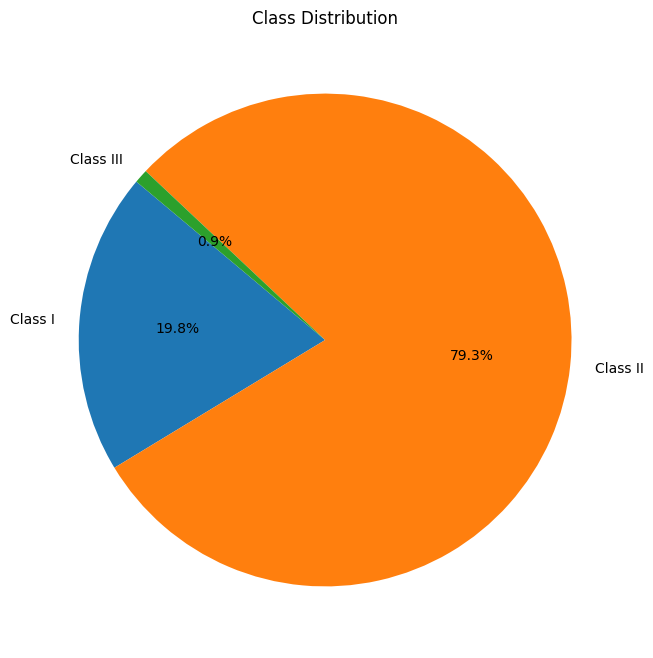

In [12]:
import matplotlib.pyplot as plt

# Extract data from the DataFrame
class_labels = df_class['Event Classification']
class_counts = df_class['Reason for Recall']

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(class_counts, labels=class_labels, autopct='%1.1f%%', startangle=140)
plt.title('Class Distribution')
plt.show()

In [13]:
fig = px.bar(df_class, x='Event Classification', y='Reason for Recall')
fig.show()

## Data Preprocessing

In [14]:
# changing datatype to string, so they can be normalized
df['Reason for Recall'] = df['Reason for Recall'].astype(str)
df['Event Classification'] = df['Event Classification'].astype(str)

In [16]:
import nltk
nltk.download('punkt')
from nltk.tokenize import RegexpTokenizer
regexp = RegexpTokenizer('\w+')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [17]:
df['Reason for Recall'] = df['Reason for Recall'].apply(regexp.tokenize)
df['Reason for Recall'].head(3)

0    [Sterility, of, device, may, be, compromised, ...
1    [Complaint, of, endoscope, model, becoming, lo...
2    [Complaint, of, endoscope, model, becoming, lo...
Name: Reason for Recall, dtype: object

In [18]:
import nltk.corpus
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords = set(stopwords.words("english"))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [19]:
df['Reason for Recall'] = df['Reason for Recall'].apply(lambda x: [word for word in x if word not in stopwords])
df['Reason for Recall'].head(3)

0    [Sterility, device, may, compromised, due, bre...
1    [Complaint, endoscope, model, becoming, lodged...
2    [Complaint, endoscope, model, becoming, lodged...
Name: Reason for Recall, dtype: object

In [20]:
nltk.download('punkt')
from nltk.stem.porter import PorterStemmer
porter = PorterStemmer()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [21]:
df['Reason for Recall'] = df['Reason for Recall'].apply(lambda word_list: [porter.stem(word) for word in word_list])
print(df['Reason for Recall'])

0       [steril, devic, may, compromis, due, breach, c...
1       [complaint, endoscop, model, becom, lodg, endo...
2       [complaint, endoscop, model, becom, lodg, endo...
3       [complaint, endoscop, model, becom, lodg, endo...
4       [complaint, endoscop, model, becom, lodg, endo...
                              ...                        
2421    [the, outer, steril, packag, caviti, corner, w...
2422                     [excess, ultraviolet, c, radiat]
2423    [the, outer, label, match, devic, insid, packa...
2424    [the, outer, label, match, devic, insid, packa...
2425    [devic, may, intermitt, fail, produc, audio, t...
Name: Reason for Recall, Length: 2426, dtype: object


In [22]:
from nltk.probability import FreqDist

In [23]:
words = [word for sublist in df['Reason for Recall'] for word in sublist]

# Create FreqDist
fdist = FreqDist(words)

# Check top 5 common words
print(fdist.most_common(5))

[('may', 1114), ('result', 854), ('potenti', 704), ('product', 671), ('steril', 609)]


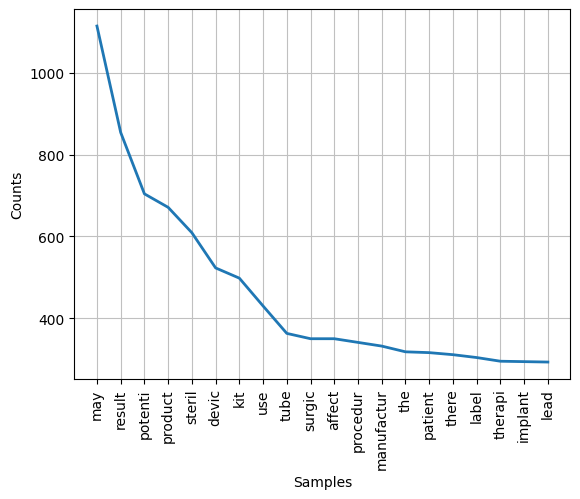

In [24]:
# Import matplotlib
import matplotlib.pyplot as plt

# Plot Frequency Distribution
fdist.plot(20, cumulative=False)
plt.show()

## Model Training

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve, f1_score

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

In [27]:
df['Reason for Recall'] = df['Reason for Recall'].apply(lambda word_list: ' '.join(word_list))

In [28]:
y = df["Event Classification"]

In [29]:
X = vectorizer.fit_transform(df['Reason for Recall'])
X.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Multinomial Naive Bayes

In [31]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB(force_alpha=True)
clf.fit(X_train, y_train)

MultinomialNB(force_alpha=True)

In [32]:
y_pred= clf.predict(X_test)

In [33]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred)

0.9567901234567902

In [53]:
from sklearn.metrics import precision_score, f1_score

precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
print("Precision:", precision)

Precision: 0.9667475959249738


In [50]:
f1 = f1_score(y_test, y_pred, average='weighted',zero_division=1)  # 'weighted' takes into account class imbalance
print("F1 Score:", f1)

F1 Score: 0.9674657342838365


In [54]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     Class I       1.00      0.96      0.98        99
    Class II       0.97      1.00      0.98       378
   Class III       0.50      0.11      0.18         9

    accuracy                           0.97       486
   macro avg       0.82      0.69      0.71       486
weighted avg       0.97      0.97      0.97       486



# Random Forest Classifier


In [44]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(class_weight='balanced', random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [45]:
y_pred= clf.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.9732510288065843

In [46]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     Class I       1.00      0.96      0.98        99
    Class II       0.97      1.00      0.98       378
   Class III       0.50      0.11      0.18         9

    accuracy                           0.97       486
   macro avg       0.82      0.69      0.71       486
weighted avg       0.97      0.97      0.97       486



In [47]:
f1 = f1_score(y_test, y_pred, average='weighted')  # 'weighted' takes into account class imbalance
print("F1 Score:", f1)

F1 Score: 0.9674657342838365


In [48]:
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix

%matplotlib inline

def confusion_matrix_heatmap(cm: np.ndarray) -> plt.Figure:
    sns.set(font_scale=2)
    fig, ax = plt.subplots(figsize=(5,5))
    sns.heatmap(cm, annot=True, fmt=',')
    ax.set_xlabel("Predicted Class")
    ax.set_ylabel("Actual Class")
    return fig

#function to print out confusion matric heatmap

In [49]:
confusion_matrix_heatmap(confusion_matrix(y_train, y_pred))
pass

ValueError: ignored